In [3]:
import numpy as np
import matplotlib.pyplot as plt

## X mobility

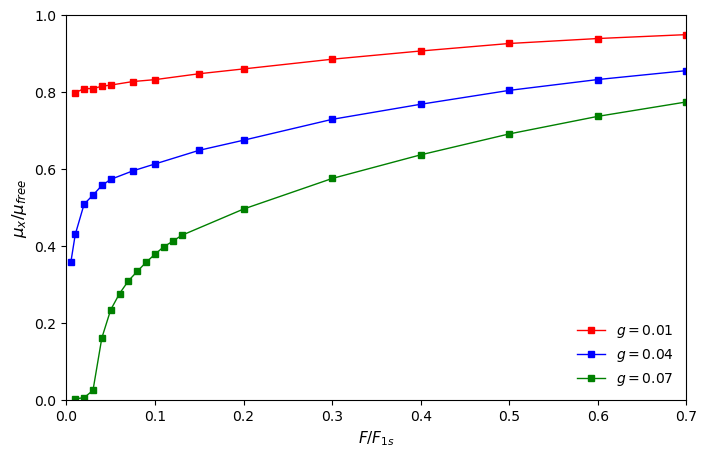

In [5]:
g=np.array([0.01,0.04,
            #0.05,
            0.07,
            #0.1
           ])
colors=np.array(['r','b', 'g', 'purple'])

plt.figure(figsize=(8,5))
for i in range(g.size):
    mobi_path="mobility_"+str(g[i])+".out"
    frac, force, mobility = np.loadtxt(mobi_path, unpack=True, usecols=(0,1,2))
    
    plt.plot(frac, mobility, marker='s', c=colors[i],
             #markerfacecolor='none', markeredgecolor=colors[i],
             markersize=4., lw=1.,
             label='$g=$'+str(g[i]))
plt.xlabel('$F/F_{1s}$', fontsize=11.)
plt.ylabel(r'$\mu_x / \mu_{free}$', fontsize=12.)
plt.legend(loc='lower right', frameon=False)
plt.xlim(left=0, right=0.7)
plt.ylim(bottom=0, top=1)

plt.savefig("mobility_x.pdf",bbox_inches='tight')

plt.show()

## Angle

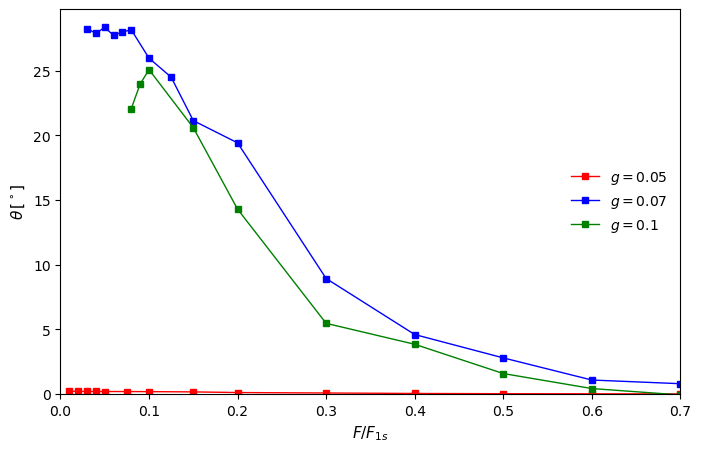

In [8]:
g=np.array([0.05,0.07, 0.1])
plt.figure(figsize=(8,5))
for i in range(g.size):
    mobi_path="angle_"+str(g[i])+".out"
    frac, force, mobility = np.loadtxt(mobi_path, unpack=True, usecols=(0,1,2))
    
    plt.plot(frac, mobility, marker='s', c=colors[i],
             #markerfacecolor='none', markeredgecolor=colors[i],
             markersize=5., lw=1.,
             label='$g=$'+str(g[i]))
plt.xlabel('$F/F_{1s}$', fontsize=11)
plt.ylabel(r'$\theta\,[^\circ]$', fontsize=11)
plt.legend(loc='center right', frameon=False)
plt.xlim(left=0, right=0.7)
plt.ylim(bottom=0)

#plt.savefig("angle.pdf",bbox_inches='tight')

plt.show()

## Transition

Plotting $F_s$ as function of $g$ reading from "transition.txt". The first plot uses estimates obtained from the power law fit, the second does not.

In [5]:
def gen_error(F_s, low_lim, up_lim):
    low_err=F_s-low_lim
    up_err=up_lim-F_s
    err = np.array(list(zip(low_err, up_err))).T
    return err

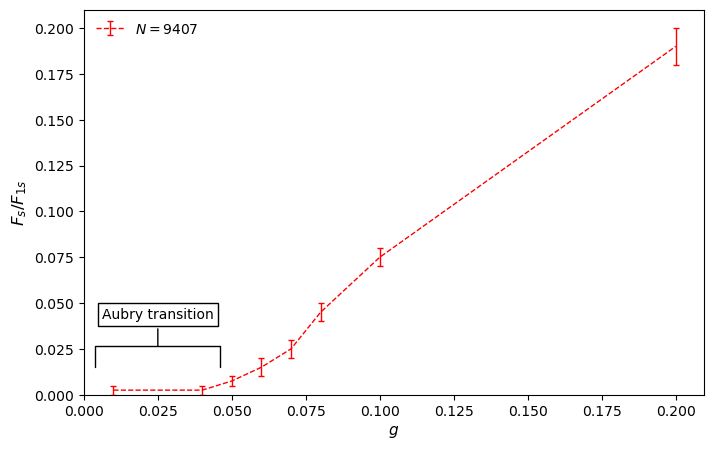

In [9]:
g, lower_limit, upper_limit= np.loadtxt("transition.txt", unpack=True, usecols=(0,1,2))
F_s=(lower_limit+upper_limit)/2
error= gen_error(F_s, lower_limit, upper_limit)

plt.figure(figsize=(8,5))
ax=plt.axes()
ax.errorbar(g,F_s,error, linestyle='dashed',
            ecolor='r',elinewidth=1, capsize=2, label='$N=9407$',
            lw=1, c='r', marker='none',
            #markerfacecolor='none', markeredgecolor='black',
             #markersize=5., zorder=1
           )
#plt.xlim(left=0)  # Ensure x-axis starts at 0
ax.set_ylim(bottom=0)  # Ensure y-axis starts at 0
ax.set_xlim(left=0)
ax.set_xlabel('$g$', fontsize=11)
ax.set_ylabel('$F_s/F_{1s}$', fontsize=12)
ax.legend(frameon=False)

#ax.text(0.01,0.04,'Aubry transition')
fs=10.
[t.set_fontsize(fs) for t in ax.xaxis.get_majorticklabels()]
[t.set_fontsize(fs) for t in ax.yaxis.get_majorticklabels()]
ax.annotate('Aubry transition', xy=(0.025,0.025), xytext=(0.025,0.04),# xycoords='axes fraction',
           ha='center', va='bottom',
            bbox=dict(boxstyle='square',fc='white', color='k'),
           arrowprops=dict(arrowstyle='-[,widthB=4.5, lengthB=1.5', lw=1, color='k'))

#plt.savefig("transition.pdf",bbox_inches='tight')
plt.show()